In [22]:
from ConvNet import ConvNet
from MNISTData import MNISTData
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary

In [6]:
my_model = ConvNet()

In [7]:
summary(my_model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 25, 25]             272
         MaxPool2d-2           [-1, 16, 24, 24]               0
            Conv2d-3            [-1, 8, 22, 22]           1,160
            Linear-4                 [-1, 1000]       3,873,000
           Dropout-5                 [-1, 1000]               0
            Linear-6                   [-1, 10]          10,010
Total params: 3,884,442
Trainable params: 3,884,442
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.19
Params size (MB): 14.82
Estimated Total Size (MB): 15.01
----------------------------------------------------------------


In [10]:
data = MNISTData()
train_loader = data.get_train_loader()
test_loader = data.get_test_loader()

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(my_model.parameters(), lr=0.01, momentum=0.9)

In [16]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = my_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.010
[1,   201] loss: 0.462
[1,   401] loss: 0.253
[2,     1] loss: 0.000
[2,   201] loss: 0.134
[2,   401] loss: 0.110
[3,     1] loss: 0.000
[3,   201] loss: 0.094
[3,   401] loss: 0.091
Finished Training


In [17]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = my_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %


In [20]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
with torch.no_grad():
    outputs = my_model(example_data)
    _, predicted = torch.max(outputs.data, 1)
print(predicted)

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 8, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5])


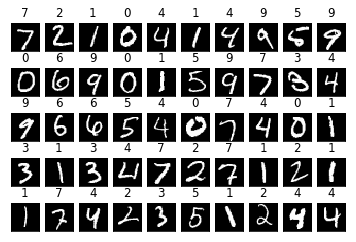

In [23]:
# see images and their labels
fig = plt.figure()
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("%d" % example_targets[i])
    plt.xticks([])
    plt.yticks([])